# Synthesizes the text image

It is always one of the headaches for us to gather images and add accurate labels to train and test the models for the computer vision tasks. However, in case of OCR, I think it will be little easier than the other computer vision tasks since we can generate several types of image and accurate labels easily. I am going to introduce how to add a text on the background image for the OCR task.

## Import libraries

We use the following libraries to synthesize the text image.

In [1]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageChops, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# "%matplotlib inline" is a curse to show the image in the notebook :-)

## Loads the background image

Let's load the background image as full color. This background image is a part of a carpet that I took by my iPhone.

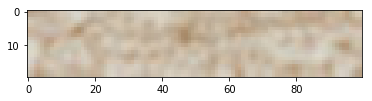

In [2]:
# Read the background image as full colored image.
background = Image.open('../dataset/sample/background100x20.jpg').convert("RGBA")

plt.imshow(background)

## Prepare foreground image

Let's create an empty image to draw the text as foreground. This image has the same size as the background image, and we can place any text on the image. The following code calculates the start position of X-axis and Y-axis to centerize the text in the background image with considering the spacing between characters.

In [3]:
# Makes a transparent foreground image for the text. (The alpha channel is zero)
foreground = Image.new('RGBA', background.size, (255,255,255,0))

# Gets a font with size 13
fnt = ImageFont.truetype('/Library/Fonts/Arial Bold.ttf', 13)

text = 'AK08587778'

# Kerning is the spacing size between characters.
kerning = 1

# Sets the start positon of the text to center the text virtically and horizontally with considering kerning
X = (foreground.size[0] - fnt.getsize(text)[0] - kerning * (len(text) - 1)) / 2
Y = (foreground.size[1] - fnt.getsize("A")[1]) / 2 

# Gets a drawing context
d = ImageDraw.Draw(foreground)

## Draws the text

Draws the characters one by one on the foreground. The text is centered horizontally and virtically. Each character in the text has the same spacing. Blurs the foreground text as the edge between foreground text and the background image looks too clear.

In [4]:
# Draw each character on the foreground 
for i in range(0, len(text)):
    w, h = fnt.getsize(text[i])
    # draw text, full opacity
    d.text((X, Y), text[i], font=fnt, fill=(0,0,0,255))
    X = X + w + kerning

# Blur the foreground to smooth the edge between foreground and background
img_blur = cv2.GaussianBlur(np.array(foreground), (1, 1), 0)

# Mix the foreground with background
out = Image.alpha_composite(background, Image.fromarray(img_blur))
print('Image Size:', out.size)

# Save the image as a test data.
out.save('../dataset/sample/' + text + '.png')

Image Size: (100, 20)


<img align="left" src="../dataset/sample/AK08587778.png" />

# Conclusion

The synthesized text image looks fine, isn't it? I got both accrate label (file name) and text image. I just introduced the concept how to synthesize the text image with accrate label. You can change this code to set the text to the random characters, or to repeat several times to get many different images that have different text, font or background images.